In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/clas_dataset.csv')

In [3]:
data.head(15)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,1.570228,0,0,0,0,1,3,1,-1.509571,1,1,1.539902,-0.778313,0
1,-0.444132,0,1,1,2,0,2,1,0.635327,1,1,0.134658,1.431004,0
2,0.451139,0,2,2,4,0,2,1,2.572655,1,1,0.134658,2.535662,0
3,0.451139,0,0,0,0,1,3,1,-0.540907,1,1,-1.551634,-0.778313,0
4,-0.779859,0,1,0,1,1,3,1,1.050469,1,1,-1.411109,-0.778313,0
5,-0.332223,0,0,0,0,0,2,1,-0.402527,1,1,0.696756,-0.225984,0
6,-0.332223,0,0,0,0,3,1,1,-1.232810,1,1,-0.286915,-0.778313,0
7,-1.563221,0,1,0,1,0,2,1,0.289376,1,1,-0.567963,-0.778313,1
8,1.570228,0,0,0,0,0,2,1,-0.886859,1,1,-0.567963,-0.778313,1
9,-0.891768,0,2,0,2,1,3,1,2.295893,2,2,-0.286915,0.326345,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3258 non-null   float64
 1   Sex                     3258 non-null   int64  
 2   T_Stage                 3258 non-null   int64  
 3   N_Stage                 3258 non-null   int64  
 4   6th_Stage               3258 non-null   int64  
 5   Differentiated          3258 non-null   int64  
 6   Grade                   3258 non-null   int64  
 7   A_Stage                 3258 non-null   int64  
 8   Tumor_Size              3258 non-null   float64
 9   Estrogen_Status         3258 non-null   int64  
 10  Progesterone_Status     3258 non-null   int64  
 11  Regional_Node_Examined  3258 non-null   float64
 12  Reginol_Node_Positive   3258 non-null   float64
 13  Mortality_Status        3258 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 3

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [6]:
feature_cols = [
    'Age',
    'Sex',
    'T_Stage',
    'N_Stage',
    '6th_Stage',
    'Differentiated',
    'Grade',
    'A_Stage',
    'Tumor_Size',
    'Estrogen_Status',
    'Progesterone_Status',
    'Regional_Node_Examined',
    'Reginol_Node_Positive'
]

X = data[feature_cols]  # Features
y = data['Mortality_Status']  # Target


In [41]:
print("Feature Names:")
print(X.columns.tolist())

print("\nShape of X and y:")
print(X.shape)
print(y.shape)


Feature Names:
['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']

Shape of X and y:
(3258, 13)
(3258,)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logreg = LogisticRegression()

In [19]:
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [20]:
y_pred_train=logreg.predict(X_train)

In [21]:
y_pred=logreg.predict(X_test)

In [22]:
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})
Comparison_df

,Actual,Predicted
624,0,1
215,0,0
3147,0,0
1900,0,0
2154,0,0
...,...,...
2557,0,1
3068,0,1
338,0,0
1677,0,0


In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred_train)

print ("the accuracy is: ", accuracy)

the accuracy is:  0.6554105909439755


In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print ("The accuracy is: ", accuracy)

The accuracy is:  0.6395705521472392


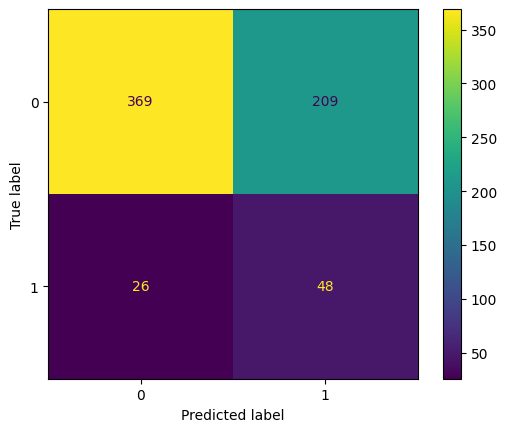

In [26]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay



cm = confusion_matrix(y_test, y_pred, labels = logreg.classes_)



disp = ConfusionMatrixDisplay(cm, display_labels = logreg.classes_)

disp.plot()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       578
           1       0.19      0.65      0.29        74

    accuracy                           0.64       652
   macro avg       0.56      0.64      0.52       652
weighted avg       0.85      0.64      0.71       652



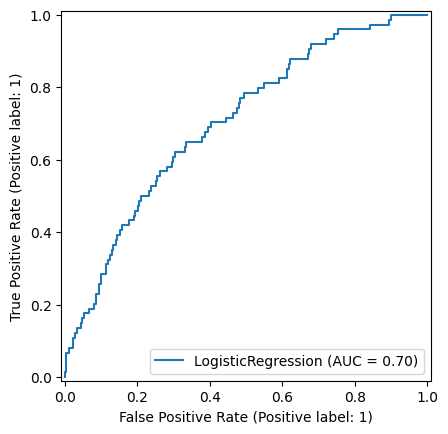

In [28]:
from sklearn.metrics import RocCurveDisplay

logreg = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'n_neighbors': list(range(1,20)), 'weights': ['uniform','distance'], 'metric': ['euclidean','manhattan']}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X, y)

print("Best Parameters for KNN:", knn_gscv.best_params_)


Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}


In [36]:
y_pred = knn_gscv.predict(X_test)

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb = nb.predict(X_test)

In [39]:
comparison_df_nb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_nb})
print(comparison_df_nb)

      Actual  Predicted
624        0          1
215        0          0
3147       0          0
1900       0          0
2154       0          0
...      ...        ...
2557       0          0
3068       0          0
338        0          0
1677       0          0
3022       0          1

[652 rows x 2 columns]


In [40]:
confusion_nb = confusion_matrix(y_test, y_pred_test_nb)
print('Confusion Matrix:\n', confusion_nb)

accuracy_nb = accuracy_score(y_test, y_pred_test_nb)
print('Accuracy:', accuracy_nb)

Confusion Matrix:
 [[522  56]
 [ 56  18]]
Accuracy: 0.8282208588957055
